In [10]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import plotnine as p9
import numpy as np

In [17]:
df=pd.read_csv("beauty.csv")
df

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,93,0,32,9,6,6,5,7,8,...,0,0,42.85714,4.1,21,1,0,3.107088,1.143040,0.000000
459,0,93,0,32,9,6,6,5,7,8,...,0,0,60.46511,4.5,86,1,0,3.107088,1.143040,0.000000
460,0,94,1,42,7,3,8,4,4,6,...,1,0,77.61194,4.4,67,1,0,3.018447,0.332051,0.000000
461,0,94,1,42,7,3,8,4,4,6,...,1,0,81.81818,4.4,66,1,0,3.018447,0.332051,0.000000


In [4]:
results = smf.ols('courseevaluation ~ btystdave', data=df).fit()
wyn=results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        11:55:55   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

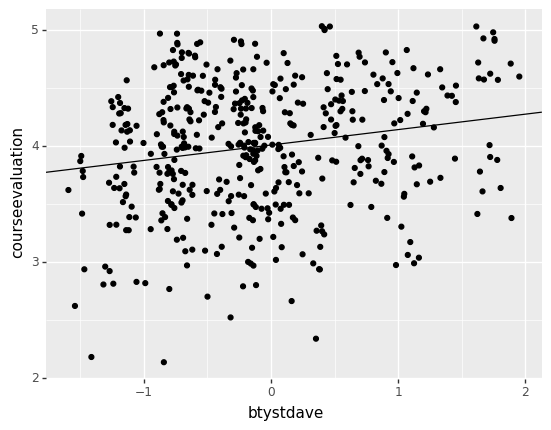

<ggplot: (-9223372036841349584)>

In [5]:
fig1=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))
fig1

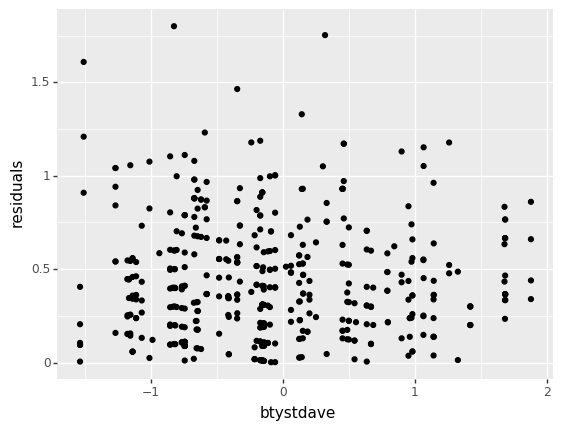

<ggplot: (-9223372036841185672)>

In [8]:
df2=df
df2['courseevaluation_pred']=results.predict()
df2['residuals']=abs(df2['courseevaluation']-df2['courseevaluation_pred'])
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df2)
      +p9.geom_point())
fig1_res

In [12]:
np.corrcoef(df2['courseevaluation'], df2['courseevaluation_pred'])

array([[1.        , 0.18903908],
       [0.18903908, 1.        ]])

In [38]:
results = smf.ols('courseevaluation ~ btystdave + female + nonenglish', data=df).fit()
wyn=results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     11.34
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           8.84e-09
Time:                        12:14:38   Log-Likelihood:                -361.89
No. Observations:                 463   AIC:                             733.8
Df Residuals:                     458   BIC:                             754.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1439      0.040    102.768      0.000       4.065       4.223
btystdave      0.1545      0.032      4.853      0.000       0.092       0.217
female        -0.2067      0.051     -4.057      0.000      -0.307      -0.107
nonenglish    -0.3444      0.104     -3.309      0.001      -0.549      -0.140
students      -0.0004      0.000     -1.300      0.194      -0.001       0.000
==============================================================================
Omnibus:                       19.149   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.777
Skew:                          -0.519   Prob(JB):                     3.08e-05
Kurtosis:                       2.991   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

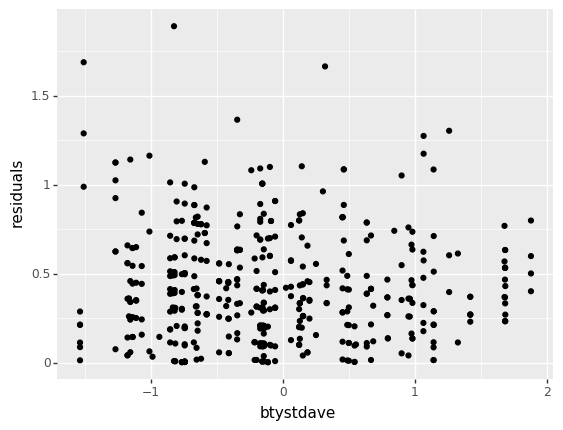

<ggplot: (-9223372036848733332)>

In [36]:
df2=df
df2['courseevaluation_pred']=results.predict()
df2['residuals']=abs(df2['courseevaluation']-df2['courseevaluation_pred'])
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df2)
      +p9.geom_point())
fig1_res

In [37]:
np.corrcoef(df2['courseevaluation'], df2['courseevaluation_pred'])

array([[1.        , 0.29449762],
       [0.29449762, 1.        ]])

In [45]:
df.corr()


,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,btystdave,btystdf2u,btystdfl,btystdfu,btystdm2u,btystdml,btystdmu,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11,class12,class13,class14,class15,class16,class17,class18,class19,class20,class21,class22,class23,class24,class25,class26,class27,class28,class29,class30,courseevaluation,didevaluation,female,formal,fulldept,lower,multipleclass,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg,courseevaluation_pred,residuals
tenured,1.000000,0.008552,-0.112777,0.395046,-0.116414,-0.071176,-0.278214,-0.113480,-0.093832,-0.142310,-0.165545,-0.116414,-0.071176,-0.280691,-0.113480,-0.093832,-0.142310,0.095192,-0.006144,-0.045662,-0.073970,0.038171,0.104392,-0.055586,-0.006144,-0.045662,-0.030734,-0.072296,0.019503,0.073575,0.019503,-0.006144,0.085050,0.112880,0.085050,0.104392,-0.114684,-0.143146,0.056666,0.095192,0.073575,0.019503,-0.034569,-0.006144,-0.008707,-0.006144,-0.012368,-0.057631,0.169608,-0.268479,0.232144,0.053244,-0.126381,0.038577,-0.078267,-0.273142,-0.107253,-0.071924,0.176054,0.583441,0.027564,-0.010820,-0.129705,-0.160310,0.078784,-0.073291
profnumber,0.008552,1.000000,0.033525,0.078193,0.081561,-0.002293,-0.039370,0.069226,0.032062,0.123640,0.054353,0.081561,-0.002293,-0.037918,0.069226,0.032062,0.123640,0.028007,-0.093324,-0.189080,-0.278636,-0.065172,-0.108140,0.105537,-0.051377,-0.137810,-0.098990,0.024127,-0.026746,-0.002255,-0.041440,-0.034598,-0.032050,-0.053487,-0.045638,-0.029609,0.015080,-0.048230,-0.000916,0.015080,-0.009113,-0.024787,-0.115891,-0.089728,0.132714,0.091242,0.187303,0.019860,0.024911,-0.064894,0.061124,-0.145312,0.459876,-0.268496,0.054686,0.203350,-0.056252,-0.032367,0.030963,0.026793,0.334768,0.078093,0.239911,-0.170299,0.051444,0.048326
minority,-0.112777,0.033525,1.000000,-0.103120,0.084787,-0.095778,0.122271,0.031403,-0.093377,0.120509,0.033060,0.084787,-0.095778,0.120412,0.031403,-0.093377,0.120509,-0.041846,-0.026380,0.138988,0.011787,0.030231,-0.045890,-0.037388,0.069040,-0.053106,-0.041846,-0.026380,-0.032343,-0.032343,0.123646,-0.026380,0.097850,0.104227,0.097850,0.009441,0.079246,0.258177,-0.062479,-0.041846,-0.032343,-0.032343,-0.032343,-0.026380,0.097850,-0.026380,0.090965,-0.076655,-0.093227,0.114642,-0.027623,0.137785,0.136129,0.175785,0.292186,0.247490,0.142359,-0.075824,-0.096993,0.061896,-0.096671,0.067205,-0.000938,0.062338,-0.186417,0.069983
age,0.395046,0.078193,-0.103120,1.000000,-0.238958,-0.109086,-0.417802,-0.083685,-0.283876,-0.331621,-0.297893,-0.238958,-0.109086,-0.421598,-0.083685,-0.283876,-0.331621,-0.070050,-0.079810,-0.142049,-0.107779,-0.010630,0.060087,-0.077363,-0.032724,-0.062493,0.107076,-0.103352,0.104203,0.120697,-0.011257,-0.029361,0.020354,0.121910,0.058487,0.149798,-0.006029,-0.005294,-0.069540,0.051590,0.049222,0.016233,-0.112972,-0.066357,0.072787,0.061446,0.108466,-0.051696,-0.030461,-0.285088,0.188307,0.080940,-0.091463,0.009641,-0.002055,-0.025277,-0.108253,-0.107032,-0.012626,-0.098865,0.013866,-0.000913,-0.266726,-0.250823,-0.043844,0.058836
beautyf2upper,-0.116414,0.081561,0.084787,-0.238958,1.000000,0.641927,0.648152,0.513062,0.535983,0.649640,0.811506,1.000000,0.641927,0.641717,0.513062,0.535983,0.649640,0.165129,-0.023321,0.018822,-0.021940,-0.033053,-0.097406,-0.102510,-0.023321,-0.030506,-0.156196,-0.006986,0.031492,0.018140,0.071549,-0.006986,-0.102510,0.021977,0.036404,-0.097406,-0.021447,0.062603,0.004558,0.009649,0.004787,-0.035270,0.031492,-0.023321,0.152165,0.025685,0.175030,0.164431,0.140370,0.206790,0.113750,0.168826,0.000973,0.021340,0.067475,-0.108683,0.176414,0.164268,0.087050,0.079641,0.272844,-0.184272,0.740895,0.667134,0.429653,-0.056869
beautyflowerdiv,-0.071176,-0.002293,-0.095778,-0.109086,0.641927,1.000000,0.619392,0.593766,0.612426,0.676695,0.846017,0.641927,1.000000,0.615029,0.593766,0.612

In [44]:
pd.options.display.max_columns = 66